✅ Final value for ode1: y(5) = 0.000046
🧪 Max Error for dy/dt = -2y: 0.000108
✅ Final value for ode2: y(5) = 0.716338
🧪 Max Error for dy/dt = sin(t): 0.000001
✅ Final value for ode3: y(5) = -0.999727
❗ No exact solution provided for: dy/dt = y^2 - 1


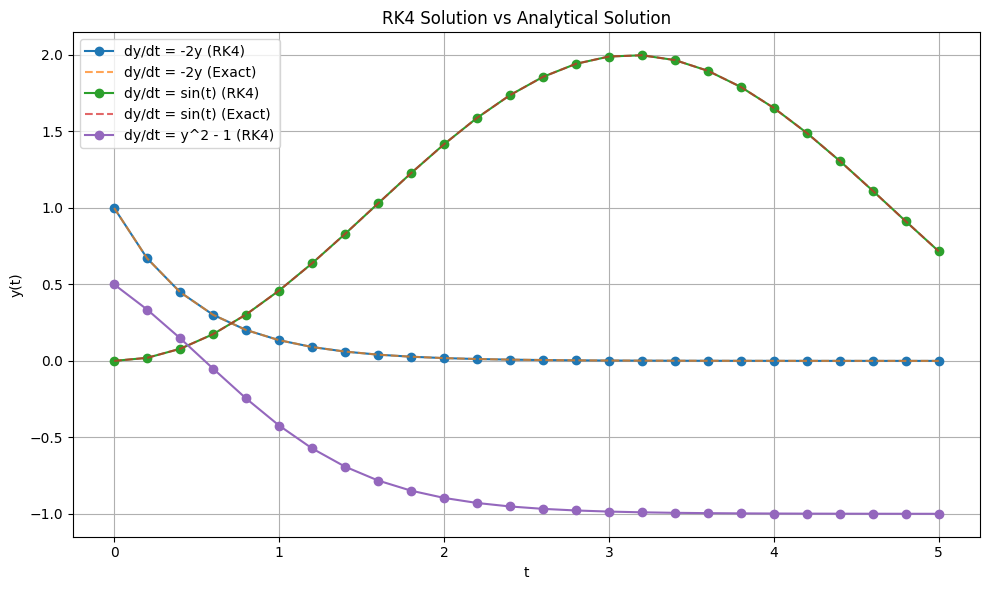

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# === Define Differential Equations ===
def ode1(t, y):  # dy/dt = -2y
    return -2 * y

def ode2(t, y):  # dy/dt = sin(t)
    return np.sin(t)

def ode3(t, y):  # dy/dt = y^2 - 1
    return y**2 - 1

# === Analytical (Exact) Solutions ===
def exact1(t):  # y(t) = exp(-2t), from dy/dt = -2y, y(0)=1
    return np.exp(-2 * t)

def exact2(t):  # y(t) = 1 - cos(t), from dy/dt = sin(t), y(0)=0
    return 1 - np.cos(t)

# === RK4 Solver ===
def runge_kutta_4(f, t0, y0, t_end, h):
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0

    while t < t_end:
        k1 = f(t, y)
        k2 = f(t + h/2, y + h * k1 / 2)
        k3 = f(t + h/2, y + h * k2 / 2)
        k4 = f(t + h, y + h * k3)

        y += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h

        t_values.append(t)
        y_values.append(y)

    # ✅ Only print final result
    print(f"✅ Final value for {f.__name__}: y({t_end}) = {y:.6f}")
    return np.array(t_values), np.array(y_values)

# === Solve and Plot with Optional Exact Solution ===
def solve_and_plot(f, y0, title, true_solution=None):
    t0 = 0
    t_end = 5
    h = 0.2
    t_vals, y_vals = runge_kutta_4(f, t0, y0, t_end, h)

    # Plot RK4 result
    plt.plot(t_vals, y_vals, 'o-', label=title + " (RK4)")

    if true_solution is not None:
        true_vals = true_solution(t_vals)
        plt.plot(t_vals, true_vals, '--', label=title + " (Exact)", alpha=0.7)
        max_err = np.max(np.abs(true_vals - y_vals))
        print(f"🧪 Max Error for {title}: {max_err:.6f}")
    else:
        print(f"❗ No exact solution provided for: {title}")

# === Main Plot ===
plt.figure(figsize=(10, 6))

solve_and_plot(ode1, 1, "dy/dt = -2y", true_solution=exact1)
solve_and_plot(ode2, 0, "dy/dt = sin(t)", true_solution=exact2)
solve_and_plot(ode3, 0.5, "dy/dt = y^2 - 1")  # No known exact solution

plt.title("RK4 Solution vs Analytical Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import py_compile
py_compile.compile("rk4_solver.py")



'__pycache__\\rk4_solver.cpython-310.pyc'

In [7]:
import dis
import marshal

# Load and disassemble bytecode
with open('__pycache__/rk4_solver.cpython-310.pyc', 'rb') as f:
    f.read(16)  # Skip .pyc header (magic number, timestamp, etc.)
    code = marshal.load(f)

dis.dis(code)


  1           0 LOAD_CONST               0 (0)
              2 LOAD_CONST               1 (None)
              4 IMPORT_NAME              0 (numpy)
              6 STORE_NAME               1 (np)

  2           8 LOAD_CONST               0 (0)
             10 LOAD_CONST               1 (None)
             12 IMPORT_NAME              2 (matplotlib.pyplot)
             14 IMPORT_FROM              3 (pyplot)
             16 STORE_NAME               4 (plt)
             18 POP_TOP

  5          20 LOAD_CONST               2 (<code object ode1 at 0x0000027CAE36C3A0, file "rk4_solver.py", line 5>)
             22 LOAD_CONST               3 ('ode1')
             24 MAKE_FUNCTION            0
             26 STORE_NAME               5 (ode1)

  8          28 LOAD_CONST               4 (<code object ode2 at 0x0000027CAE36C7C0, file "rk4_solver.py", line 8>)
             30 LOAD_CONST               5 ('ode2')
             32 MAKE_FUNCTION            0
             34 STORE_NAME               6 (

In [8]:
import collections
# Count instructions
counter = collections.Counter()
for instr in dis.get_instructions(code):
    counter[instr.opname] += 1

# Print results
for opname, count in counter.most_common():
    print(f"{opname:20s}: {count}")

LOAD_CONST          : 34
LOAD_NAME           : 16
POP_TOP             : 12
STORE_NAME          : 9
MAKE_FUNCTION       : 7
LOAD_METHOD         : 7
CALL_METHOD         : 7
CALL_FUNCTION_KW    : 3
IMPORT_NAME         : 2
IMPORT_FROM         : 1
LOAD_ATTR           : 1
CALL_FUNCTION       : 1
RETURN_VALUE        : 1


In [9]:
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "snakeviz"])

0

In [4]:
# also you can excute here
import cProfile
import rk4_solver
cProfile.run('rk4_solver')


         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




✅ Final value for ode1: y(5) = 0.000046
🧪 Max Error for dy/dt = -2y: 0.000108
✅ Final value for ode2: y(5) = 0.716338
🧪 Max Error for dy/dt = sin(t): 0.000001
✅ Final value for ode3: y(5) = -0.999727
❗ No exact solution provided for: dy/dt = y^2 - 1


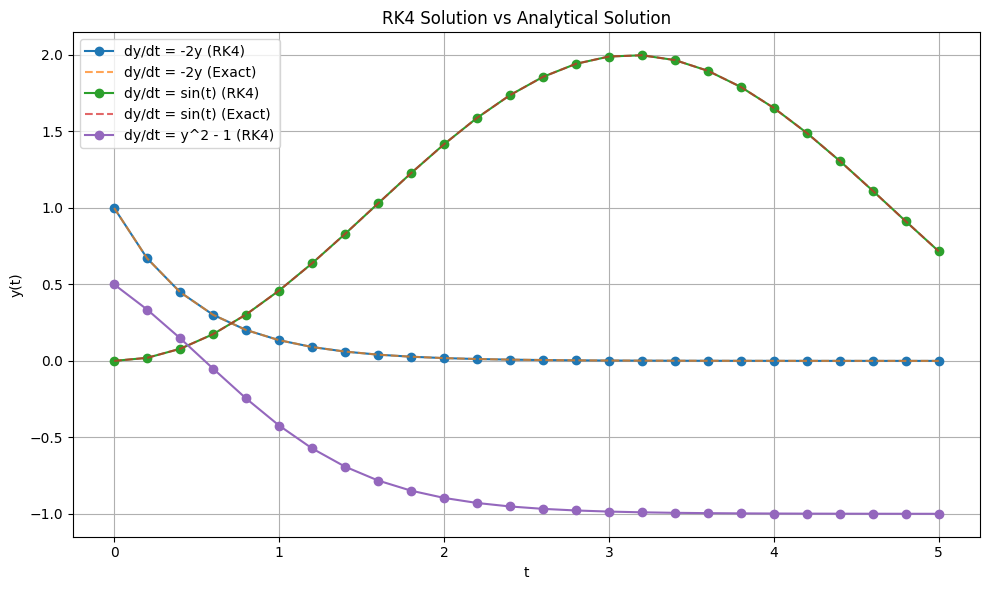

In [2]:
# profile_cnn.py
import cProfile
import rk4_solver  # assuming cnn.py defines a main or train function

# Run profiling and save results to 'profile_output.prof'
cProfile.run('rk4_solver', filename='DESprofile_output.prof')

In [ ]:
subprocess.run(["snakeviz", "result/DESprofile_output.prof"])


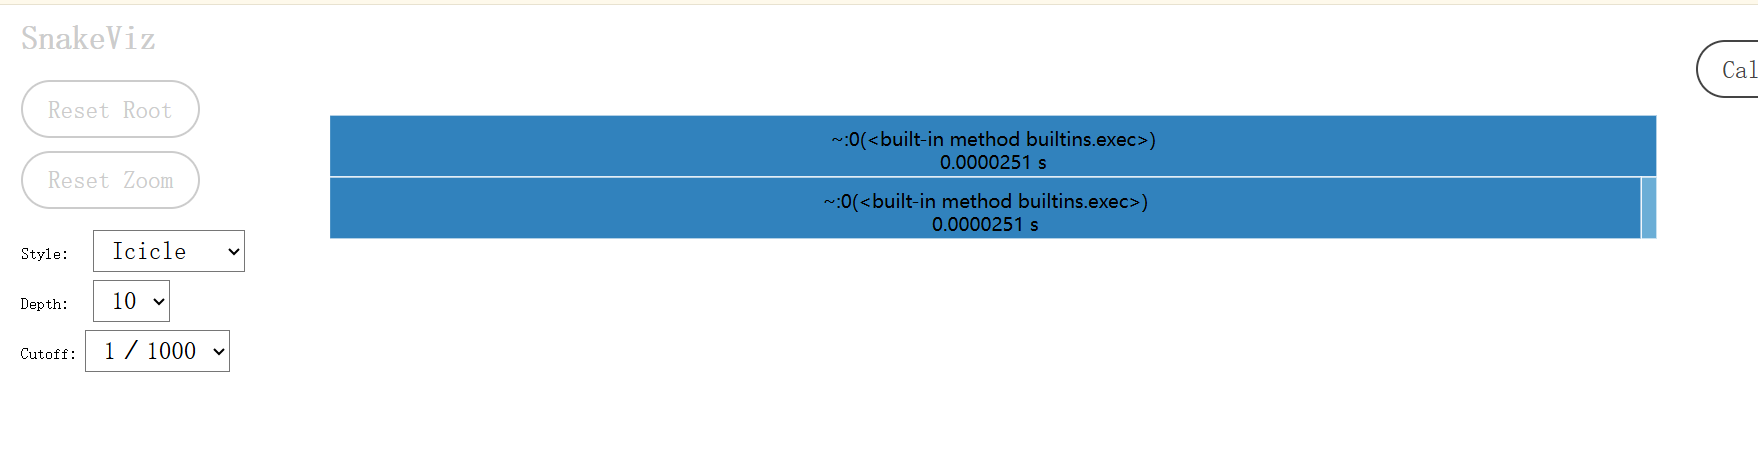

In [1]:
from IPython.display import Image

Image(filename="result/DEStimer.png")

Line  1: READ set() | WRITE {'np'}
Line  2: READ set() | WRITE {'plt'}
Line  5: READ set() | WRITE {'ode1'}
Line  6: READ {'y'} | WRITE set()
Line  8: READ set() | WRITE {'ode2'}
Line  9: READ {'t', 'np'} | WRITE set()
Line 11: READ set() | WRITE {'ode3'}
Line 12: READ {'y'} | WRITE set()
Line 15: READ set() | WRITE {'exact1'}
Line 16: READ {'t', 'np'} | WRITE set()
Line 18: READ set() | WRITE {'exact2'}
Line 19: READ {'t', 'np'} | WRITE set()
Line 22: READ set() | WRITE {'runge_kutta_4'}
Line 23: READ {'t0'} | WRITE {'t_values'}
Line 24: READ {'y0'} | WRITE {'y_values'}
Line 26: READ {'t0'} | WRITE {'t'}
Line 27: READ {'y0'} | WRITE {'y'}
Line 29: READ {'k1', 'y', 'k4', 'f', 'y_values', 't_end', 'k2', 't_values', 'h', 't', 'k3'} | WRITE {'k4', 'k1', 'y', 'k2', 't', 'k3'}
Line 42: READ {'f', 'print', 't_end', 'y'} | WRITE set()
Line 43: READ {'y_values', 't_values', 'np'} | WRITE set()
Line 46: READ set() | WRITE {'solve_and_plot'}
Line 47: READ set() | WRITE {'t0'}
Line 48: READ set()

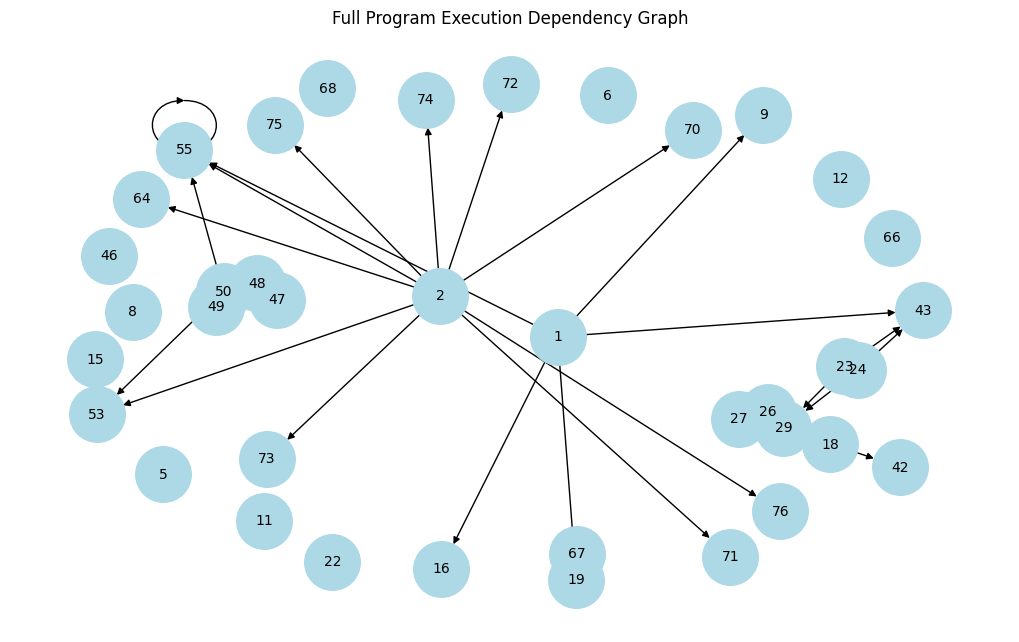


⚡ Potentially parallel lines: [5, 6, 8, 11, 12, 15, 18, 22, 46, 66, 67, 68]


In [30]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

class GlobalExecutionAnalyzer(ast.NodeVisitor):
    def __init__(self):
        self.reads = defaultdict(set)
        self.writes = defaultdict(set)
        self.dependencies = []
        self.symbol_table = {}
        self.line_order = []
        self.current_line = None

    def visit_statements_in_order(self, statements):
        for stmt in statements:
            if hasattr(stmt, 'lineno'):
                self.current_line = stmt.lineno
                self.line_order.append(self.current_line)

            self.visit(stmt)

            for var in self.reads[self.current_line]:
                if var in self.symbol_table:
                    from_line = self.symbol_table[var]
                    self.dependencies.append((from_line, self.current_line))

            for var in self.writes[self.current_line]:
                self.symbol_table[var] = self.current_line

    def visit_Name(self, node):
        if isinstance(node.ctx, ast.Load):
            self.reads[self.current_line].add(node.id)
        elif isinstance(node.ctx, ast.Store):
            self.writes[self.current_line].add(node.id)

    def visit_Assign(self, node):
        for target in node.targets:
            self.visit(target)
        self.visit(node.value)

    def visit_AugAssign(self, node):
        self.visit(node.target)
        self.visit(node.value)

    def visit_Expr(self, node):
        self.visit(node.value)

    def visit_Call(self, node):
        self.visit(node.func)
        for arg in node.args:
            self.visit(arg)

    def visit_FunctionDef(self, node):
        # Record function name as a variable (it's assigned!)
        self.writes[self.current_line].add(node.name)
        self.visit_statements_in_order(node.body)

    def visit_Import(self, node):
        for alias in node.names:
            self.writes[self.current_line].add(alias.asname or alias.name)

    def visit_ImportFrom(self, node):
        for alias in node.names:
            self.writes[self.current_line].add(alias.asname or alias.name)

def analyze_entire_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        source = f.read()

    tree = ast.parse(source)
    analyzer = GlobalExecutionAnalyzer()
    analyzer.visit_statements_in_order(tree.body)

    for line in analyzer.line_order:
        print(f"Line {line:2}: READ {analyzer.reads[line]} | WRITE {analyzer.writes[line]}")

    G = nx.DiGraph()
    for line in analyzer.line_order:
        G.add_node(line)

    for from_line, to_line in analyzer.dependencies:
        G.add_edge(from_line, to_line)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1600, font_size=10, arrows=True)
    plt.title("Full Program Execution Dependency Graph")
    plt.show()

    parallel_lines = [n for n in G.nodes if G.in_degree(n) == 0 and G.out_degree(n) == 0]
    print(f"\n⚡ Potentially parallel lines: {parallel_lines}")

# Run on your script
analyze_entire_file("rk4_solver.py")


# attempt to try solve the q
import dis
import marshal
import py_compile
import os

def compile_py_file(py_file):
    py_compile.compile(py_file)
    name_only = py_file.replace(".py", "")
    for fname in os.listdir("__pycache__"):
        if fname.startswith(name_only) and fname.endswith(".pyc"):
            return os.path.join("__pycache__", fname)
    raise FileNotFoundError("Compiled .pyc not found.")

#  Code Object ===
def load_code(pyc_path):
    with open(pyc_path, "rb") as f:
        f.read(16)  # skip pyc header
        return marshal.load(f)

# === 获得指令的栈影响（入栈 + 出栈）===
def get_stack_effect(instr):
    try:
        return dis.stack_effect(instr.opcode, instr.arg)
    except TypeError:
        return dis.stack_effect(instr.opcode)

# === 分析每条字节码指令的栈级依赖关系 ===
def analyze_stack_dependencies(code_obj):
    instructions = list(dis.get_instructions(code_obj))
    stages = []
    available = set()
    scheduled = set()
    deps = {}  # 每条指令依赖于哪些指令
    stack = []

    for i, instr in enumerate(instructions):
        pops = max(-get_stack_effect(instr), 0)
        inputs = set()
        for _ in range(pops):
            if stack:
                inputs.add(stack.pop())
        deps[i] = inputs
        if get_stack_effect(instr) > 0:
            stack.append(i)

    # === 分阶段调度可并行指令 ===
    while len(scheduled) < len(instructions):
        stage = []
        for i, instr in enumerate(instructions):
            if i in scheduled:
                continue
            if deps[i].issubset(available):
                stage.append(i)
        if not stage:
            print("⚠️  Stuck: circular or unresolved dependencies.")
            break
        stages.append(stage)
        scheduled.update(stage)
        available.update(stage)

    return stages, instructions

# === 输出每一阶段的执行指令 ===
def print_stages(stages, instructions):
    print("\n📌 Stack-Based Parallel Execution Plan:")
    for idx, stage in enumerate(stages):
        print(f"\n🧵 Stage {idx}:")
        for i in stage:
            instr = instructions[i]
            print(f"  {i:>3}: {instr.opname:<20} {instr.argrepr}")

# === 主流程 ===
def analyze_and_print(py_file):
    pyc_path = compile_py_file(py_file)
    code = load_code(pyc_path)
    stages, instrs = analyze_stack_dependencies(code)
    print_stages(stages, instrs)

# ✅ 调用方式
# analyze_and_print("rk4_solver.py")
